<a href="https://colab.research.google.com/github/mohmaed7777/Breast-cancer-repo/blob/main/Breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dataset Description**

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)
3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)
b) texture (standard deviation of gray-scale values)
c) perimeter
d) area
e) smoothness (local variation in radius lengths)
f) compactness (perimeter^2 / area - 1.0)
g) concavity (severity of concave portions of the contour)
h) concave points (number of concave portions of the contour)
i) symmetry
j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant



In [72]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn 
import seaborn as sns 
sns.set()
%config InlineBackend.figure_formats=['retina']
%matplotlib inline
%pylab inline
print('Setup completed=======>^______^')

Populating the interactive namespace from numpy and matplotlib
Setup completed=======>^______^


In [73]:
df = pd.read_csv('/content/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [74]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [75]:
df.columns.tolist()

['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'Unnamed: 32']

In [76]:
df.shape

(569, 33)

In [77]:
# Dealing with the missing values: 
missing_values = df.isnull().sum()
missing_values[:10]

id                     0
diagnosis              0
radius_mean            0
texture_mean           0
perimeter_mean         0
area_mean              0
smoothness_mean        0
compactness_mean       0
concavity_mean         0
concave points_mean    0
dtype: int64

In [78]:
# Get the percentage values of the missing data: 
total_cells = np.product(df.shape)
total_missings = missing_values.sum()
percent = (total_missings / total_cells ) * 100 
print(percent)

3.0303030303030303


In [79]:
# Drop out any columns which contain at least one missing value: 
df.dropna(axis=1, inplace=True)
# Check our dataframe after dropping the missing values: 
df.head(2)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [80]:
df.drop(['id'], axis=1, inplace=True)

In [81]:
round(df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
radius_mean,569.0,14.13,3.52,6.98,11.70,13.37,15.78,28.11
texture_mean,569.0,19.29,4.30,9.71,16.17,18.84,21.80,39.28
perimeter_mean,569.0,91.97,24.30,43.79,75.17,86.24,104.10,188.50
area_mean,569.0,654.89,351.91,143.50,420.30,551.10,782.70,2501.00
smoothness_mean,569.0,0.10,0.01,0.05,0.09,0.10,0.11,0.16
compactness_mean,569.0,0.10,0.05,0.02,0.06,0.09,0.13,0.35
concavity_mean,569.0,0.09,0.08,0.00,0.03,0.06,0.13,0.43
concave points_mean,569.0,0.05,0.04,0.00,0.02,0.03,0.07,0.20
symmetry_mean,569.0,0.18,0.03,0.11,0.16,0.18,0.20,0.30
fractal_dimension_mean,569.0,0.06,0.01,0.05,0.06,0.06,0.07,0.10


In [82]:
df.describe(include='object')

,diagnosis
count,569
unique,2
top,B
freq,357


In [83]:
stats_df = df.describe()

stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']
out_fileds = ['mean', '25%', '50%', '75%', 'range']
stats_df.loc[out_fileds]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
mean,14.127292,19.289649,91.969033,654.889104,0.09636,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.26919,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
25%,11.700000,16.170000,75.170000,420.300000,0.08637,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.01000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.09587,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.97000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.10530,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.79000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
range,21.129000,29.570000,144.710000,2357.500000,0.11077,0.326020,0.426800,0.201200,0.198000,0.047480,2.761500,4.524800,21.223000,535.398000,0.029417,0.133148,0.396000,0.052790,0.071068,0.028945,28.11000,37.520000,200.790000,4068.800000,0.151430,1.030710,1.252000,0.291000,0.507300,0.152460


[Text(0, 0.5, 'Local variation in radius lengths'),
 Text(0.5, 0, 'The mean value among three largest areas'),
 Text(0.5, 1.0, 'The mean value among three largest areas vs Smoothness (local variation in radius lengths)')]

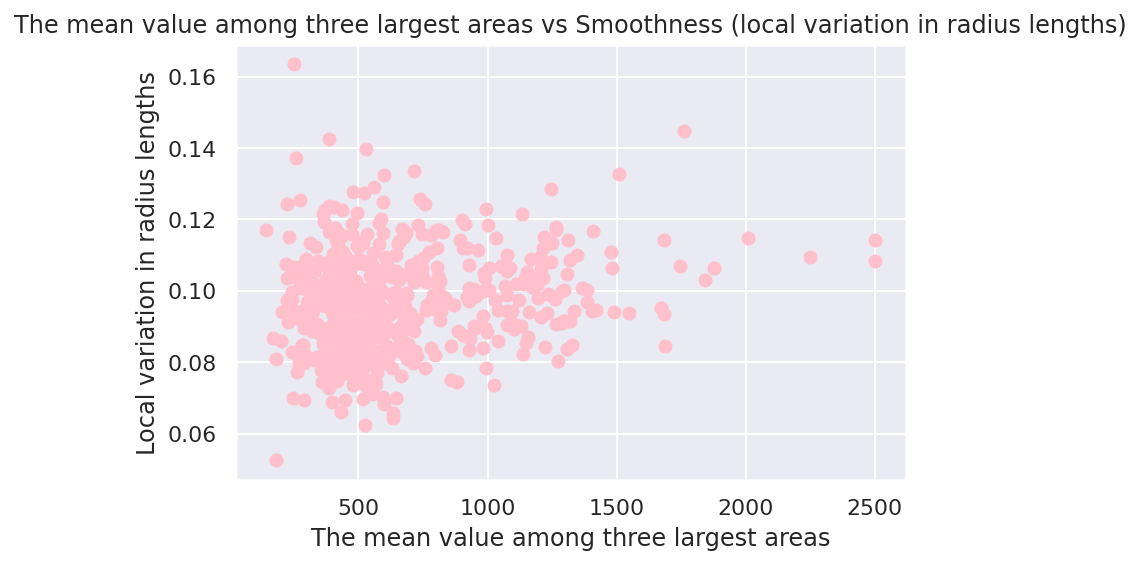

In [84]:
# Create a scatter plot : 

ax = plt.axes()

ax.scatter(df.area_mean, df.smoothness_mean, color='pink', alpha=1.0)
ax.set(xlabel='The mean value among three largest areas',
       ylabel='Local variation in radius lengths',
       title='The mean value among three largest areas vs Smoothness (local variation in radius lengths)')

[Text(0, 0.5, 'Concavity mean'),
 Text(0.5, 0, 'Fractal mean'),
 Text(0.5, 1.0, 'Fractal vs dimension')]

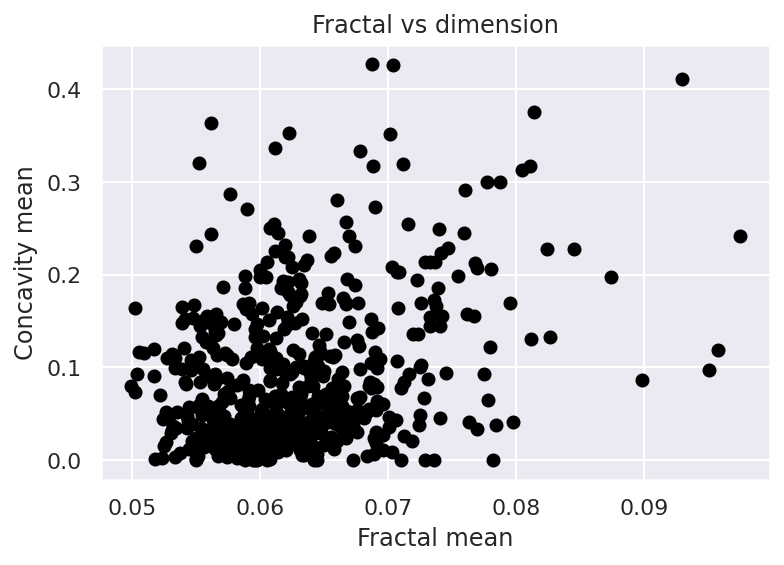

In [85]:
ax = plt.axes()

ax.scatter(df.fractal_dimension_mean, df.concavity_mean, color='black')
ax.set(xlabel='Fractal mean',
       ylabel='Concavity mean',
       title='Fractal vs dimension')

[Text(0, 0.5, 'Frequncy'),
 Text(0.5, 0, 'Class distribution: 357 benign, 212 malignant of Breast cancer'),
 Text(0.5, 1.0, 'Breast Cancer Wisconsin')]

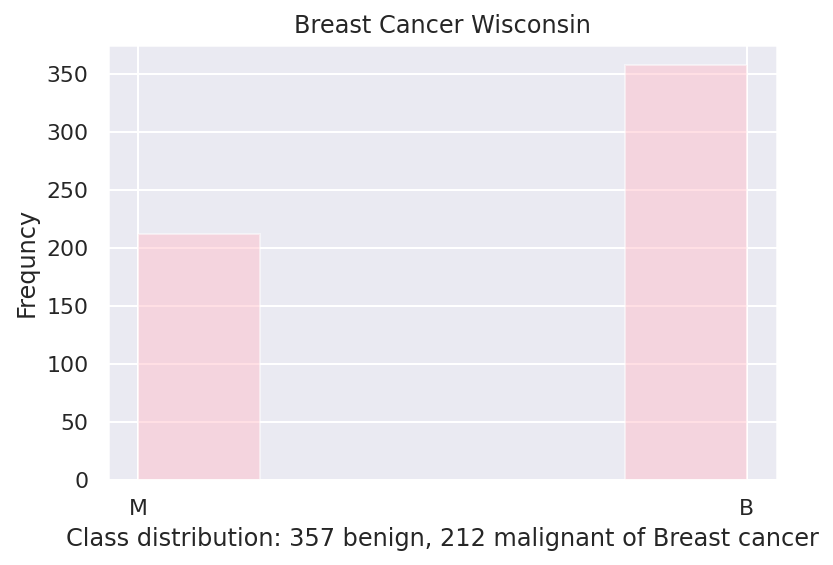

In [86]:
# create a histogram: 

ax = plt.axes()
ax.hist(df.diagnosis, bins=5, alpha=0.5, color='pink')
ax.set(xlabel='Class distribution: 357 benign, 212 malignant of Breast cancer',
       ylabel='Frequncy',
       title='Breast Cancer Wisconsin')

In [87]:
df.shape

(569, 31)

In [88]:
df.dtypes.value_counts()

float64    30
object      1
dtype: int64

In [89]:
# Check the data are all scaled from -1.0(minimum) to 1.0(maximum):
df.iloc[:, :-1].min().value_counts()

0.0                      6
0.0008948000000000001    1
12.02                    1
0.049960000000000004     1
0.757                    1
0.002252                 1
0.106                    1
6.981                    1
7.93                     1
0.07117000000000001      1
9.71                     1
43.79                    1
B                        1
0.02729                  1
143.5                    1
0.01938                  1
0.3602                   1
50.41                    1
0.007882                 1
0.001713                 1
0.1115                   1
6.8020000000000005       1
185.2                    1
0.1565                   1
0.052629999999999996     1
dtype: int64

In [90]:
df.iloc[:, :-1].max().value_counts()

188.5                  1
251.2                  1
1.058                  1
2.873                  1
0.6638                 1
4.885                  1
2501.0                 1
M                      1
0.09744                1
1.252                  1
49.54                  1
542.2                  1
0.1354                 1
0.2012                 1
21.98                  1
0.02984                1
0.03113                1
0.2226                 1
28.11                  1
4254.0                 1
0.07895                1
0.396                  1
0.304                  1
0.29100000000000004    1
36.04                  1
39.28                  1
0.05279                1
0.4268                 1
0.3454                 1
0.1634                 1
dtype: int64

In [91]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

#**1- Applying Support vector machine kernal:-**

a) Its'a Binary classification where **B** Stand for **benign** & **M** stands for **Malignant**.

b) create a pairplot for all data.

c) Create a barplot showing the correlation between each column and y.

d) pick the most two corrleated fields by using the absoluate value for correlation and then create x.

e) Use **MinMaxScaler()** to scale our X featuers.

In [92]:
# Create the target variable y: 
y = (df['diagnosis'] == 'B').astype(int)
fields = list(df.columns[:-1]) # everything expect y
correlation = df[fields].corrwith(y)
correlation.sort_values(inplace = True)
correlation

concave points_worst     -0.793566
perimeter_worst          -0.782914
concave points_mean      -0.776614
radius_worst             -0.776454
perimeter_mean           -0.742636
area_worst               -0.733825
radius_mean              -0.730029
area_mean                -0.708984
concavity_mean           -0.696360
concavity_worst          -0.659610
compactness_mean         -0.596534
compactness_worst        -0.590998
radius_se                -0.567134
perimeter_se             -0.556141
area_se                  -0.548236
texture_worst            -0.456903
smoothness_worst         -0.421465
symmetry_worst           -0.416294
texture_mean             -0.415185
concave points_se        -0.408042
smoothness_mean          -0.358560
symmetry_mean            -0.330499
compactness_se           -0.292999
concavity_se             -0.253730
fractal_dimension_se     -0.077972
symmetry_se               0.006522
texture_se                0.008303
fractal_dimension_mean    0.012838
smoothness_se       

In [96]:
(df.diagnosis == 'B')

0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568     True
Name: diagnosis, Length: 569, dtype: bool

In [97]:
(df.diagnosis == 'B').astype(int)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

After we tranform the values of our target(diagnosis), **0** ==> **binegin** and **1** ==> **malignant**

In [98]:
# Create aplairplot for all our data: 
sns.set_context('talk')
sns.set_style('white')

In [ ]:
sns.pairplot(df)